# Digit Recognition Using MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

## 1. Load the MNIST Dataset using Keras

In [2]:
# load MNIST dataset
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

## 2. Data Pre-Processing and Graphs for each Process
* Normalization.
* Gaussian blurring
* Expand dimensions 

In [3]:
# convert to float32 and normalize pixel values
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

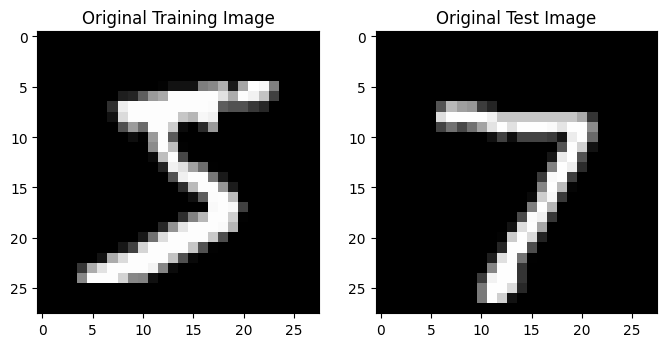

In [4]:
# plot original images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(training_images[0], cmap='gray')
axs[0].set_title('Original Training Image')
axs[1].imshow(test_images[0], cmap='gray')
axs[1].set_title('Original Test Image')
plt.show()

In [5]:
# apply Gaussian blurring to remove noise
training_images = cv2.GaussianBlur(training_images, (5, 5), 0)
test_images = cv2.GaussianBlur(test_images, (5, 5), 0)

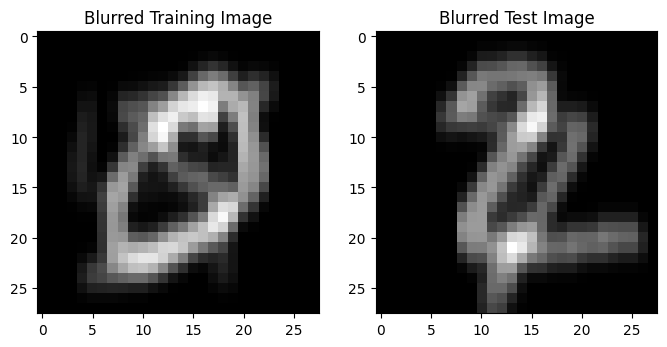

In [6]:
# plot blurred images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(training_images[0], cmap='gray')
axs[0].set_title('Blurred Training Image')
axs[1].imshow(test_images[0], cmap='gray')
axs[1].set_title('Blurred Test Image')
plt.show()

In [7]:
# expand dimensions of images to match the input shape of the model
training_images = np.expand_dims(training_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
training_images.shape

(60000, 28, 28, 1)

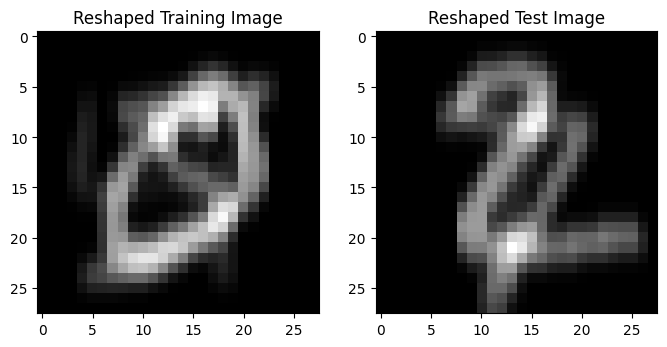

In [8]:
# plot reshaped images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(training_images[0], cmap='gray')
axs[0].set_title('Reshaped Training Image')
axs[1].imshow(test_images[0], cmap='gray')
axs[1].set_title('Reshaped Test Image')
plt.show()

## 3. Build and Compile the model

In [9]:
# Build the model
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [10]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# fit the model
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.2857 - accuracy: 0.5498
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.1126 - accuracy: 0.6089
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0345 - accuracy: 0.6315
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.9766 - accuracy: 0.6506
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9320 - accuracy: 0.6662
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8902 - accuracy: 0.6795
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8517 - accuracy: 0.6930
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8207 - accuracy: 0.7040
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7883 - accuracy: 0.7132
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [12]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

1/1 [==============================] - 0s 326ms/step
[[1.1300474e-03 5.5441865e-06 9.0945643e-01 1.6102860e-05 2.6733784e-07
  2.2881092e-04 8.6112450e-06 8.9090697e-02 5.3598240e-05 9.8848150e-06]]


## 4. Confusion Metrics

In [13]:
# compute predictions
predictions = model.predict(test_images)

# convert predictions from one-hot encoding to labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = predicted_labels[:, np.newaxis]  # convert to 2D array with shape (num_samples, 1)

313/313 [==============================] - 1s 4ms/step


In [14]:
# compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels).numpy()

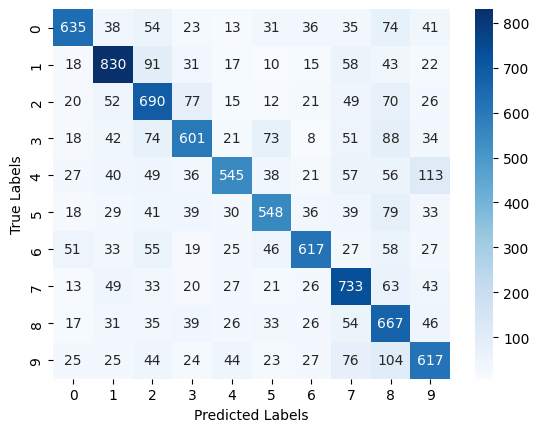

In [15]:
# create heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

# set labels for x and y axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# show plot
plt.show()

In [16]:
# compute accuracy
accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

# compute precision
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)

# compute recall
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

# compute specificity
specificity = []
for i in range(10):
    class_indices = np.where(np.arange(10) != i)[0]
    tn = np.sum(confusion_matrix[class_indices][:, class_indices])
    fp = np.sum(confusion_matrix[class_indices][:, i])
    specificity.append(tn / (tn + fp))

# compute F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# print metrics
print('Confusion Matrix:')
print(confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)

Confusion Matrix:
[[635  38  54  23  13  31  36  35  74  41]
 [ 18 830  91  31  17  10  15  58  43  22]
 [ 20  52 690  77  15  12  21  49  70  26]
 [ 18  42  74 601  21  73   8  51  88  34]
 [ 27  40  49  36 545  38  21  57  56 113]
 [ 18  29  41  39  30 548  36  39  79  33]
 [ 51  33  55  19  25  46 617  27  58  27]
 [ 13  49  33  20  27  21  26 733  63  43]
 [ 17  31  35  39  26  33  26  54 667  46]
 [ 25  25  44  24  44  23  27  76 104 617]]
Accuracy: 0.6483
Precision: [0.75415677 0.71000855 0.59176672 0.66116612 0.71428571 0.65628743
 0.74069628 0.62171332 0.51228879 0.61576846]
Recall: [0.64795918 0.73127753 0.66860465 0.5950495  0.55498982 0.61434978
 0.6440501  0.71303502 0.68480493 0.61149653]
Specificity: [0.9770509977827051, 0.9617597292724196, 0.9469223907225691, 0.9657397107897664, 0.9758261255267243, 0.9684892402283707, 0.9761114797611148, 0.9502897904592065, 0.929647684467095, 0.9571794016238461]
F1 Score: [0.69703622 0.72048611 0.62784349 0.6263679  0.62464183 0.63462652

## 5. Gradio Interface to visualize the model

In [17]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return str(pred)

In [18]:
def predict_uploaded_image(img):
    # preprocess the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.bitwise_not(img)
    img = img.reshape(-1, 28, 28)
    img = img.astype('float32')
    img = img / 255.0
    
    # make prediction
    prediction = model.predict(img)
    digit = np.argmax(prediction)
    
    return str(digit)

In [19]:
# Define the input component as an image upload component
input_component = gr.components.Image(shape=(28,28))

# Define the output component as a label component
output_component = gr.components.Label(num_top_classes=1)

In [20]:
iface1 = gr.Interface(predict_image, inputs="sketchpad", outputs="label")
iface2 = gr.Interface(predict_uploaded_image, inputs=input_component, outputs=output_component)

In [21]:
iface1.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 91ms/step


In [22]:
iface2.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 61ms/step
